In [16]:
import subprocess
import sys
import os
import time
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

Задаем начальные параметры генерации:

In [65]:
cpp_executable = "./maingen"    # путь к скомпилированной C++ программе
output_file = "result.txt"  # файл, в который C++ программа пишет результат
reps = 1000;                # количество повторений метода Монте-Карло
N = 100000;                   # размер выборки
delta = 0.5;               # расстояние для постройки дистанционного графа
distrib = "norm";                # вид распределения: uni, exp, norm 
type_ = "click";             # тип статистики: click, concomp, 
param = 3                  # параметр для некоторых статистик, например число клик для click

input_args = list(map(str, [N, delta, reps, distrib, type_, param]))
command = [cpp_executable] + input_args

Генерируем выборку:

In [66]:
process = subprocess.Popen(
    command,
    text=True,
    stdout=subprocess.PIPE
)
with tqdm(total=100, unit="%") as pbar:
    while True:
        line = process.stdout.readline()
        if not line:
            break
        try:
            progress_str = line.split("Progress:")[0].strip()
            progress_value = float(progress_str)
            pbar.update(progress_value - pbar.n)
        except ValueError:
            pass

100%|█| 100.0/100 [00:25<00:00,  3.95%


In [67]:
with open(output_file, 'r', encoding='utf-8') as f:
    file = f.read()
file = list(map(float, file.split()))
data = pd.Series(file)
result = data

Создаем картинку для визуальной оценки нормальности распределения: гистограмму и QQ-plot:

Text(0.5, 1.0, 'Q-Q Plot')

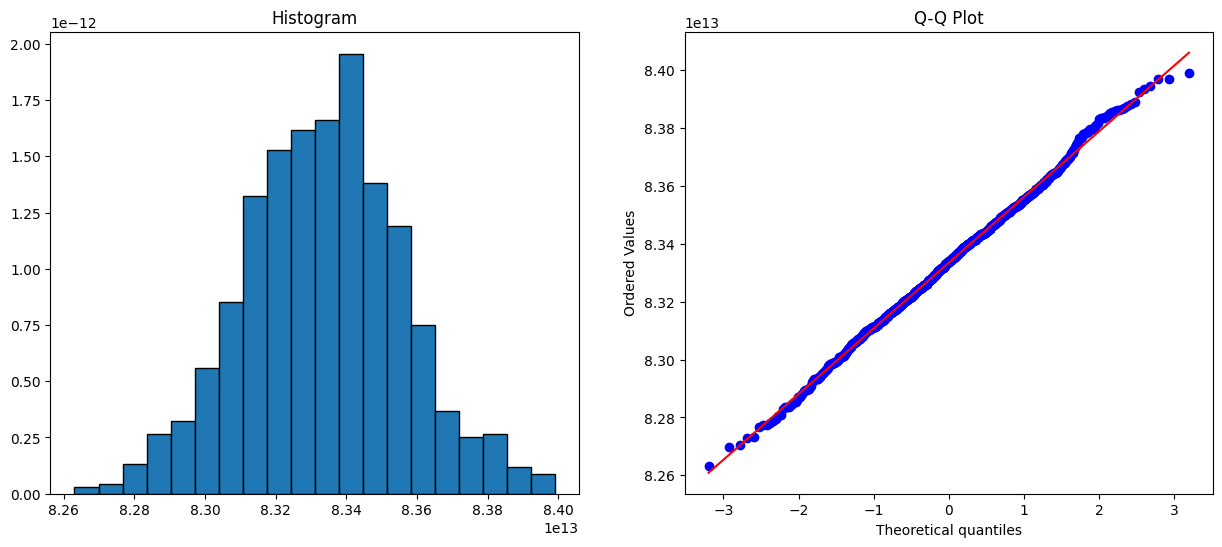

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

freq, edges = np.histogram(result, bins=20, density=True)
ax[0].bar(edges[:-1], freq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0].set_title('Histogram')

result_array = np.asarray(result)
qq = stats.probplot(result_array, rvalue=False, plot=ax[1])
ax[1].set_title('Q-Q Plot')

In [52]:
deltas = [lambda x: 0.1, lambda x: 1/math.log(x), lambda x: 1/math.log(x)/math.log(x), lambda x: 1/math.cbrt(x), lambda x: 1/math.sqrt(x), lambda x: 1/(math.cbrt(x)**2), lambda x: 1/x]
Ns = [10, 100, 1000, 10000, 100000, 1000000]
distribs = ["uni", "exp", "norm"]

In [23]:
for N_ in Ns:
    for index, func in enumerate(deltas):
        print(N_, func(N_))

10 0.1
10 0.43429448190325176
10 0.18861169701161387
10 0.46415888336127786
10 0.31622776601683794
10 0.21544346900318836
10 0.1
100 0.1
100 0.21714724095162588
100 0.04715292425290347
100 0.21544346900318836
100 0.1
100 0.04641588833612778
100 0.01
1000 0.1
1000 0.14476482730108395
1000 0.02095685522351266
1000 0.1
1000 0.03162277660168379
1000 0.01
1000 0.001
10000 0.1
10000 0.10857362047581294
10000 0.011788231063225867
10000 0.04641588833612779
10000 0.01
10000 0.0021544346900318834
10000 0.0001
100000 0.1
100000 0.08685889638065036
100000 0.007544467880464557
100000 0.021544346900318836
100000 0.003162277660168379
100000 0.0004641588833612778
100000 1e-05
1000000 0.1
1000000 0.07238241365054197
1000000 0.005239213805878165
1000000 0.01
1000000 0.001
1000000 0.0001
1000000 1e-06


In [25]:
for distrib_ in distribs:
    for N_ in Ns:
        for index, func in enumerate(deltas):
            delta_ = round(func(N_), 6)
            input_args = list(map(str, [N_, delta_, reps, distrib_, "click", 3]))
            command = [cpp_executable] + input_args
            process = subprocess.run(
                command,
                text=True,
                stdout=subprocess.PIPE
            )
            print(distrib_, N_, delta_)
            with open(output_file, 'r', encoding='utf-8') as f:
                file = f.read()
            file = list(map(float, file.split()))
            data = pd.Series(file)
            result = data
            fig, ax = plt.subplots(1, 2, figsize=(15, 6))
            
            freq, edges = np.histogram(result, bins=20, density=True)
            ax[0].bar(edges[:-1], freq, width=np.diff(edges), edgecolor="black", align="edge")
            #ax[0].set_title('Histogram')
            
            result_array = np.asarray(result)
            stats.probplot(result_array, rvalue=False, plot=ax[1])
            #ax[1].set_title('Q-Q Plot')
            fig.savefig(f'{distrib_}/{N_}/{index}_{delta_}.png')
            plt.close()

uni 10 0.1
uni 10 0.434294
uni 10 0.188612
uni 10 0.464159
uni 10 0.316228
uni 10 0.215443
uni 10 0.1
uni 100 0.1
uni 100 0.217147
uni 100 0.047153
uni 100 0.215443
uni 100 0.1
uni 100 0.046416
uni 100 0.01
uni 1000 0.1
uni 1000 0.144765
uni 1000 0.020957
uni 1000 0.1
uni 1000 0.031623
uni 1000 0.01
uni 1000 0.001
uni 10000 0.1
uni 10000 0.108574
uni 10000 0.011788
uni 10000 0.046416
uni 10000 0.01
uni 10000 0.002154
uni 10000 0.0001
uni 100000 0.1
uni 100000 0.086859
uni 100000 0.007544
uni 100000 0.021544
uni 100000 0.003162
uni 100000 0.000464
uni 100000 1e-05
uni 1000000 0.1
uni 1000000 0.072382
uni 1000000 0.005239
uni 1000000 0.01
uni 1000000 0.001
uni 1000000 0.0001
uni 1000000 1e-06
exp 10 0.1
exp 10 0.434294
exp 10 0.188612
exp 10 0.464159
exp 10 0.316228
exp 10 0.215443
exp 10 0.1
exp 100 0.1
exp 100 0.217147
exp 100 0.047153
exp 100 0.215443
exp 100 0.1
exp 100 0.046416
exp 100 0.01
exp 1000 0.1
exp 1000 0.144765
exp 1000 0.020957
exp 1000 0.1
exp 1000 0.031623
exp 1000 0.01

In [ ]:
fig.savefig('triannorm.png')

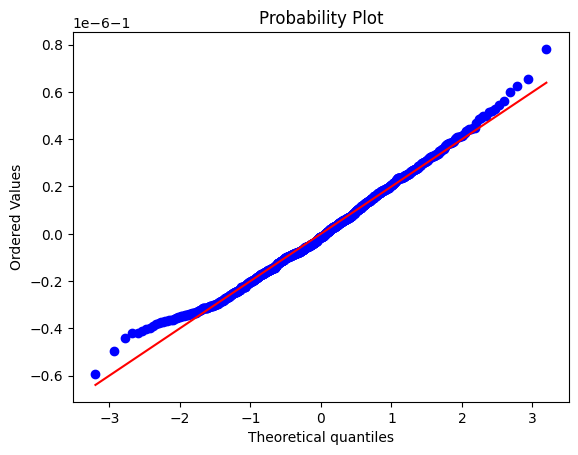

In [271]:
stats.probplot(result, rvalue=False, plot=plt)
plt.savefig("8.png")